In [1]:
from weak2strong import Weak2StrongExplanation, load_exp_data
import pandas as pd
import numpy as np
from scipy.stats import entropy as cal_entropy
# if use local model, model_root_path should be a root path; 
# or the model is loaded from hugging face, this should be owner, like "meta-llama/"
model_root_path = '../../models/llama/meta-llama/'#"../../models/llama-2/llama/"
# load_exp_data needs correct model_name so that load conversation template from fastchat.
model_name = 'Meta-Llama-3.1-8B-Instruct'#"Meta-Llama-3.1-8B-Instruct"
normal, malicious, jailbreak, neutral, mali_test = load_exp_data(use_conv=True, model_name=model_name, jail_success = True)
temperature = 1
test = Weak2StrongExplanation(f"{model_root_path}/{model_name}", layer_nums=32, return_report=False, return_visual=True, debug=True, temperature= temperature)

/home/ubuntu/miniconda3/envs/ihs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading ./exp_data/jail_success_prompt_2.csv


Loading checkpoint shards: 100%|██████████| 4/4 [01:58<00:00, 29.71s/it]


In [2]:
normal_test = normal[-60:]
#mali_t = malicious[-60:]
comb = normal_test + jailbreak
jail_labels = [0] * len(normal_test) + [1] * len(jailbreak)

##### norm: 0, jail(mali): 1

In [4]:
neutral = normal[-60:]
entropy, test_entropy, mali_classify, jail_classify, test_acc, valid_acc, \
            norm_prob_list, mali_prob_lst, jail_prob_list, var_mali_classify, var_jail_classify, just_jail_features = test.explain({"norm":normal, "mali":malicious,  "jail":jailbreak, 'neutral': neutral, 'mali_test': mali_test})
# check the ASR
#test.check_MJ(jailbreak, typ='jailbreak')
#test.vis_kdf('norm','mali','jail')

In [3]:
comb_check, check_dict = test.check_MJ(comb, typ='comb', jail_labels=jail_labels, threshold=0.4) 

cuda


Processing:   0%|          | 0/142 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Processing:   1%|          | 1/142 [00:49<1:57:14, 49.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Processing:   1%|▏         | 2/142 [01:34<1:49:02, 46.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TPR (True Positive Rate): 0.7926829268292683
FPR (False Positive Rate): 0.0


In [8]:
check_dict['prob_list']

[[array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32)],
 [array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32)],
 [array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32)],
 [array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32)],
 [array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32)],
 [array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([[1.0000000e+00, 1.0000007e-10]], dtype=float32),
  array([

In [7]:
check_dict['js_check']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.044917951864051814,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001348995845235668,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05053071018888202,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5550364082010395,
 0.0,
 0.5550364082010395,
 0.0,
 0.0,
 0.000382996919459993,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5675639002314571,
 0.0,
 0.0,
 0.0,
 0.5550364082010395,
 0.5550364082010395,
 0.5550364082010395,
 0.5550364082010395,
 0.0,
 0.5550364082010395,
 0.5550364082010395,
 0.5550364082010395,
 0.55503640820

In [6]:
comb_check

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0]

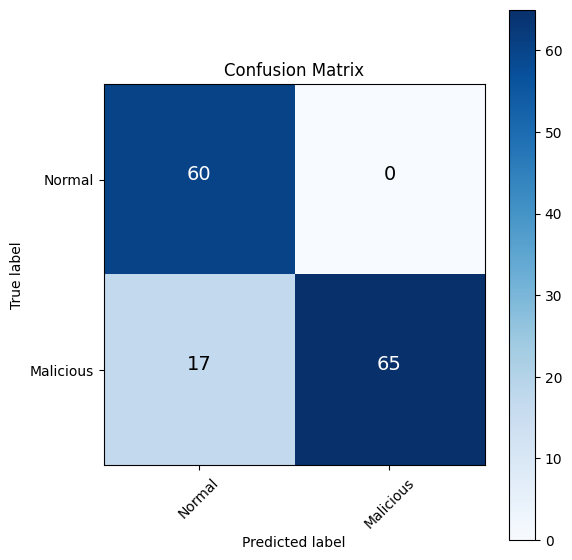

Classification Report:
              precision    recall  f1-score   support

      Normal       0.78      1.00      0.88        60
   Malicious       1.00      0.79      0.88        82

    accuracy                           0.88       142
   macro avg       0.89      0.90      0.88       142
weighted avg       0.91      0.88      0.88       142



In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

cm = confusion_matrix(jail_labels, comb_check)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Malicious'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Malicious'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black", fontsize=14)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(jail_labels, comb_check, target_names=['Normal', 'Malicious']))

#### 可以使用对不同层间预测的概率进行不确定性分析

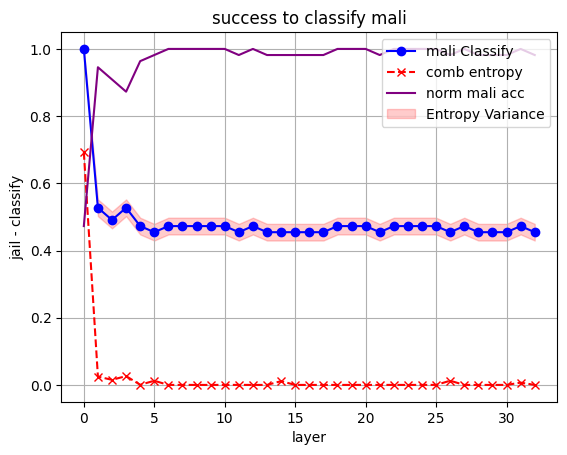

In [7]:
import matplotlib.pyplot as plt

entropy_comb_lst = [e.mean() for e in entropy]
#entropy_mali_lst = [e.mean() for e in entropy[63:]]
var_mali_classify = np.array(var_mali_classify) * 0.3

plt.plot(mali_classify, label='mali Classify', color='blue', linestyle='-', marker='o')
plt.plot(entropy_comb_lst, label='comb entropy', color='red', linestyle='--', marker='x')
plt.plot(test_acc, label = 'norm mali acc', color='purple')
#plt.plot(entropy_norm_lst, label='both_norm', color='green')

x = np.arange(len(mali_classify)) 
plt.fill_between(x, np.array(mali_classify) - var_mali_classify, np.array(mali_classify) + var_mali_classify,
                 color='red', alpha=0.2, label='Entropy Variance')

plt.title("success to classify mali")
plt.xlabel("layer")
plt.ylabel("jail - classify")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

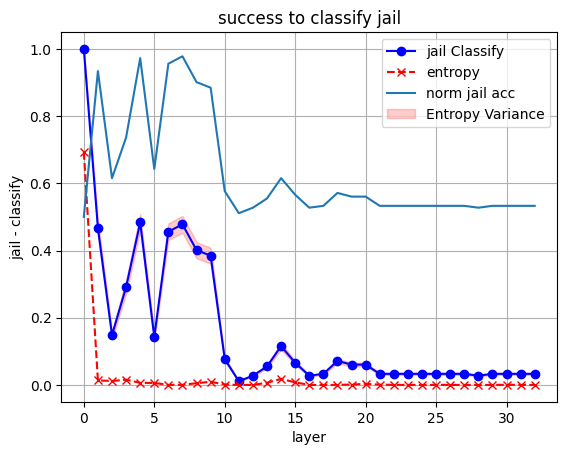

In [8]:
entropy_lst = [e.mean() for e in test_entropy]
var_jail_classify = np.array(var_jail_classify) * 0.3

plt.plot(jail_classify, label='jail Classify', color='blue', linestyle='-', marker='o')
plt.plot(entropy_lst, label='entropy', color='red', linestyle='--', marker='x')
plt.plot(valid_acc, label = 'norm jail acc')
#plt.plot(entropy_norm_lst, label='both_norm_entropy', color='green')

x = np.arange(len(jail_classify)) 
plt.fill_between(x, np.array(jail_classify) - var_jail_classify, np.array(jail_classify) + var_jail_classify,
                 color='red', alpha=0.2, label='Entropy Variance')

plt.title("success to classify jail")
plt.xlabel("layer")
plt.ylabel("jail - classify")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

#### Try on sucs_jail

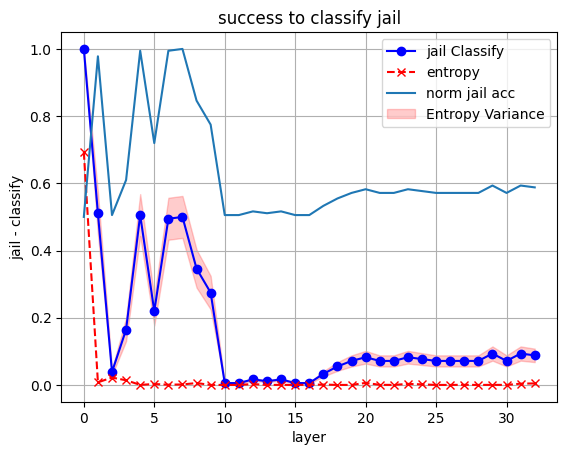

In [14]:
normal, malicious, jailbreak, neutral, mali_test = load_exp_data(use_conv=True, model_name=model_name, jail_success = True)
entropy, test_entropy, mali_classify, jail_classify, test_acc, valid_acc,\
      mali_test_prob_p, jail_test_prob_p, var_mali_classify, var_jail_classify = test.explain({"norm":normal, "mali":malicious,  "jail":jailbreak, 'neutral': neutral, 'mali_test': mali_test})

entropy_lst = [e.mean() for e in test_entropy]
var_jail_classify = np.array(var_jail_classify) * 0.3

plt.plot(jail_classify, label='jail Classify', color='blue', linestyle='-', marker='o')
plt.plot(entropy_lst, label='entropy', color='red', linestyle='--', marker='x')
plt.plot(valid_acc, label = 'norm jail acc')
#plt.plot(entropy_norm_lst, label='both_norm_entropy', color='green')

x = np.arange(len(jail_classify)) 
plt.fill_between(x, np.array(jail_classify) - var_jail_classify, np.array(jail_classify) + var_jail_classify,
                 color='red', alpha=0.2, label='Entropy Variance')

plt.title("success to classify jail")
plt.xlabel("layer")
plt.ylabel("jail - classify")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

In [7]:
# import pandas as pd

# df= pd.read_csv('jailbreak_results.csv')
# df2 = df.loc[df['malicious']==1, 'Input']
# test.vis_heatmap(df2)

## 测试一下现在的

In [8]:
# import pandas as pd
# df= pd.read_csv('sucs_jail.csv')
# df2 = df.loc[df['malicious']==1, 'Input']
# df2.shape

### 已经可以确信，llama2在面对成功jailbreak的数据时，情感层完全失控

In [9]:
#test.vis_heatmap_2(df2)

In [10]:
# test.vis_heatmap(df2.tolist(), left = 15, right=24, model_name='llama2-chat-7b')

In [11]:
# test.vis_heatmap(normal, left = 15, right=24, model_name='llama2-chat-7b')

In [12]:
# test.vis_heatmap(malicious, left = 15, right=24, model_name='llama2-chat-7b')